# U.S. Medical Insurance Costs

<b>Looking over dataset:</b>
The insurance.csv dataset seems to be well organized. Instead of using names, this data set just has the row as an id. My first thought is that it might be interesting to analyze insurance cost by region. Also, to explore how much of an impact each of the features has on the cost and perhaps in some of the features also have correlations between eachother.

<b>Scoping Your Project:</b> The main goal of this project is to quantify how much of an impact each of the features has on the insurance cost and find the top 3. Additionally, I will analyze how these top 3 features are correlated to the other features. Doing so will hopefully give some information on what is likely to lead to increased insurace costs.

In [1]:
# importing dataset and saving it to a dictonary using index as an ID:
import csv

insurance_dict = {}
index = 0
with open('insurance.csv') as insurance:
    insurance_dict_temp = csv.DictReader(insurance)
    for row in insurance_dict_temp:
        insurance_dict.update({index:row})
        index += 1

insurance_dict

{0: {'age': '19',
  'sex': 'female',
  'bmi': '27.9',
  'children': '0',
  'smoker': 'yes',
  'region': 'southwest',
  'charges': '16884.924'},
 1: {'age': '18',
  'sex': 'male',
  'bmi': '33.77',
  'children': '1',
  'smoker': 'no',
  'region': 'southeast',
  'charges': '1725.5523'},
 2: {'age': '28',
  'sex': 'male',
  'bmi': '33',
  'children': '3',
  'smoker': 'no',
  'region': 'southeast',
  'charges': '4449.462'},
 3: {'age': '33',
  'sex': 'male',
  'bmi': '22.705',
  'children': '0',
  'smoker': 'no',
  'region': 'northwest',
  'charges': '21984.47061'},
 4: {'age': '32',
  'sex': 'male',
  'bmi': '28.88',
  'children': '0',
  'smoker': 'no',
  'region': 'northwest',
  'charges': '3866.8552'},
 5: {'age': '31',
  'sex': 'female',
  'bmi': '25.74',
  'children': '0',
  'smoker': 'no',
  'region': 'southeast',
  'charges': '3756.6216'},
 6: {'age': '46',
  'sex': 'female',
  'bmi': '33.44',
  'children': '1',
  'smoker': 'no',
  'region': 'southeast',
  'charges': '8240.5896'},
 

In [2]:
# creating variables to use for analysis:
def get_catergory_list(feature_name, dictionary):
    category_list = []
    for i, row in dictionary.items():
        if row.get(feature_name) in feature_name:
            continue
        else:
            category_list.append(row.get(feature_name))
            
def average_of_target(target, dictionary):
    average_target = {}
    total = 0
    for i, row in dictionary.items():
        total += float(row.get(target))
        count = i + 1
    average_target.update({target:total / count})
    return average_target
        
        
def average_cost_by_feature(feature_name, target, dictionary):
    
    feature_list = []
    for i, row in dictionary.items():
        if row.get(feature_name) in feature_name:
            continue
        else:
            feature_list.append(row.get(feature_name))
            
    feature_dictionary = {}
    for f in feature_list:
        feature_dict_temp = {}
        feature_total = 0
        feature_count = 1
        for index, row in dictionary.items():
            if row.get(feature_name) == f:
                try:
                    feature_total += float(row.get(target))
                    feature_count += 1
                except:
                    continue
            else:
                continue
        feature_avg_cost = feature_total / feature_count
        feature_dictionary.update({f:feature_avg_cost})
    return feature_dictionary

average_cost = average_of_target("charges", insurance_dict)
    
average_cost_by_age = average_cost_by_feature('age', "charges", insurance_dict)
average_cost_by_sex = average_cost_by_feature('sex', "charges", insurance_dict)
average_cost_by_bmi = average_cost_by_feature('bmi', "charges", insurance_dict)
average_cost_by_num_children = average_cost_by_feature('children', "charges", insurance_dict)
average_cost_by_smoking = average_cost_by_feature('smoker', "charges", insurance_dict)
average_cost_by_region = average_cost_by_feature('region', "charges", insurance_dict)       

In [3]:
print("Average cost:\n", average_cost)
print("-----------------------------------------------------------------------------------------------------")
print("Average cost by age:\n ", average_cost_by_age)
print("-----------------------------------------------------------------------------------------------------")
print("Average cost by sex:\n ", average_cost_by_sex)
print("-----------------------------------------------------------------------------------------------------")
print("Average cost by BMI:\n ", average_cost_by_bmi)
print("-----------------------------------------------------------------------------------------------------")
print("Average cost by number of children:\n ", average_cost_by_num_children)
print("-----------------------------------------------------------------------------------------------------")
print("Average cost by smoking status:\n ", average_cost_by_smoking)
print("-----------------------------------------------------------------------------------------------------")
print("Average cost by region:\n ", average_cost_by_region)

Average cost:
 {'charges': 13270.422265141257}
-----------------------------------------------------------------------------------------------------
Average cost by age:
  {'19': 9606.635286231884, '18': 6984.985876985716, '28': 8756.456958620687, '33': 11894.06880259259, '32': 8878.807687407409, '31': 9832.802695714285, '46': 13864.504283999999, '37': 17326.83834346154, '60': 21063.609402916667, '25': 9499.111334482757, '62': 18365.362549583333, '23': 11991.550383103446, '56': 14469.01525, '27': 11764.53959310345, '52': 17647.72739533333, '30': 12264.856416785711, '34': 11183.397449629629, '59': 18169.105318846152, '63': 19056.456858333335, '55': 15565.85861851852, '22': 9667.659256896552, '26': 5922.314091034483, '35': 10872.290414615387, '24': 10280.842997931035, '41': 9308.969019285714, '38': 7791.090071153846, '36': 11735.073209615384, '21': 4567.34487, '48': 14144.750430333332, '40': 11351.813763214286, '58': 13345.12318423077, '53': 15468.484866896553, '43': 18579.161558571428, 

<b>Observations</b>: Not surprisingly the biggest single factor appears to be smoking with an average difference of over $20,000 in chargers for smokers. There does not seem to be as much much of a difference by region as I would suspect. It group ages/bmi into categories to any trends easier to determine. Also, will make a scatter plot of them. The charges per number of children seems to peak at 3 and then taper off at 4 and 5. Finally, I should come up with some kind of a metric to determine how much each feature affects the charges. An initial guess would be the range of the feature affects compared to the overall average of charges.

In [4]:
#Creating scatter plots of age and BMI:

In [5]:
#Grouping age and BMI into ranges:

def average_cost_by_grouped_feature(feature_name, target, dictionary, grouping):
    
    dictionary_copy = dictionary.copy()
    for i, row in dictionary.items():
        for j, group in grouping.items():
            try:
                if str(round(float(row.get(feature_name)))) in [str(x) for x in range(group[0], group[1]+1)]:
                    dictionary_copy[i].update({feature_name:j})
                else:
                    continue
            except:
                continue
    feature_list = []
    for i, row in dictionary_copy.items():
        if row.get(feature_name) in feature_name:
            continue
        else:
            feature_list.append(row.get(feature_name))
            
    feature_dictionary = {}
    for f in feature_list:
        feature_dict_temp = {}
        feature_total = 0
        feature_count = 1
        for index, row in dictionary_copy.items():
            if row.get(feature_name) == f:
                try:
                    feature_total += float(row.get(target))
                    feature_count += 1
                except:
                    continue
            else:
                continue
        feature_avg_cost = feature_total / feature_count
        feature_dictionary.update({f:feature_avg_cost})
    return feature_dictionary
            

age_grouping = {"age_0":[0,0], "age_1_10":[1,10], "age_10_20":[11,20], "age_20_30":[21,30], "age_30_40":[31,40], "age_40_50":[41,50], "age_50_60":[51,60], "age_60_70":[61,70], "age_70_80":[71,80], "age_80_90":[81,90], "age_90_100":[91,100]}

average_cost_by_age_group = average_cost_by_grouped_feature("age", "charges", insurance_dict, age_grouping)
average_cost_by_age_group

bmi_grouping = {"bmi_0":[0,0], "bmi_1_10":[1,10], "bmi_10_20":[11,20], "bmi_20_30":[21,30], "bmi_30_40":[31,40], "bmi_40_50":[41,50], "bmi_50_60":[51,60]}
average_cost_by_bmi_group = average_cost_by_grouped_feature("bmi", "charges", insurance_dict, bmi_grouping)

print(average_cost_by_bmi_group, average_cost_by_age_group)

{'bmi_20_30': 11084.150873347538, 'bmi_30_40': 15398.867377374774, 'bmi_40_50': 17607.098572162173, 'bmi_10_20': 8796.72446648148, 'bmi_50_60': 15221.6203} {'age_10_20': 8661.305871191616, 'age_20_30': 9770.878245053762, 'age_30_40': 11594.195053720932, 'age_40_50': 14729.624484645388, 'age_50_60': 16998.148805112778, 'age_60_70': 20834.21596967391}


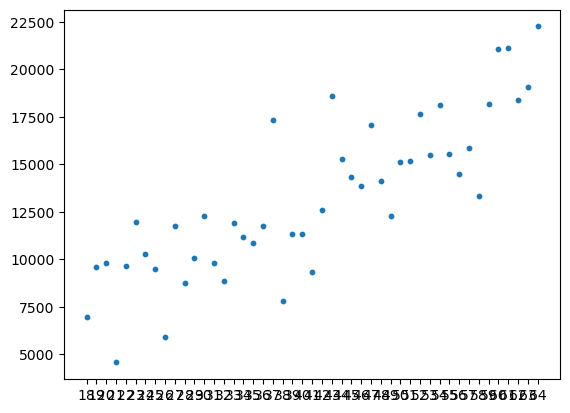

In [33]:
#Creating scatter plots of age and BMI:
import matplotlib.pyplot as plt

plt.scatter(x=sorted(average_cost_by_age), y=[average_cost_by_age[b] for b in sorted(average_cost_by_age)], s=10 )

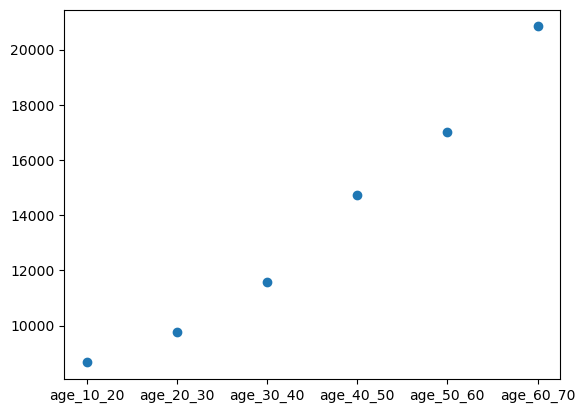

In [6]:
#Creating scatter plots of age and BMI:
import matplotlib.pyplot as plt

plt.scatter(x=average_cost_by_age_group.keys(), y=average_cost_by_age_group.values())

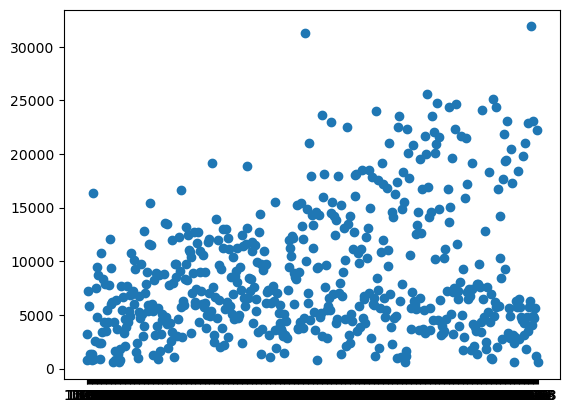

In [13]:
plt.scatter(x=sorted(average_cost_by_bmi), y=[average_cost_by_bmi[b] for b in sorted(average_cost_by_bmi)])

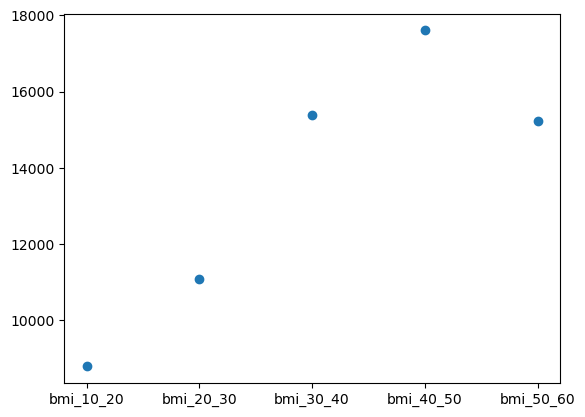

In [10]:

plt.scatter(x=sorted(average_cost_by_bmi_group), y=[average_cost_by_bmi_group[b] for b in sorted(average_cost_by_bmi_group)])

In [9]:
[average_cost_by_bmi_group[b] for b in sorted(average_cost_by_bmi_group)]

[8796.72446648148,
 11084.150873347538,
 15398.867377374774,
 17607.098572162173,
 15221.6203]